In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import datetime
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [2]:
# membaca file dan ubah tanggal menjadi time series
df = pd.read_csv("Jawa Tengah.csv")
df['Tanggal'] = pd.to_datetime(df.Tanggal)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  365 non-null    datetime64[ns]
 1   Tn       353 non-null    float64       
 2   Tx       361 non-null    float64       
 3   Tavg     361 non-null    float64       
 4   RH_avg   361 non-null    float64       
 5   RR       285 non-null    float64       
 6   ss       361 non-null    float64       
 7   ff_x     363 non-null    float64       
 8   ddd_x    363 non-null    float64       
 9   ff_avg   363 non-null    float64       
 10  ddd_car  363 non-null    object        
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 31.5+ KB


<ipython-input-2-bc3ed80ffdc8>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Tanggal'] = pd.to_datetime(df.Tanggal)


In [3]:
#ambil data tanggal, tn (temperatur minimum), tx(temperatur maksimum), RR(curah hujan), Tavg(tempeartur rata rata)
df1 = df[["Tanggal", "Tn","Tx","RR", "Tavg"]]
df1

,Tanggal,Tn,Tx,RR,Tavg
0,2023-01-01,24.2,29.1,10.2,26.6
1,2023-02-01,25.0,31.2,0.4,27.8
2,2023-03-01,25.6,31.0,0.0,27.1
3,2023-04-01,25.2,32.2,0.2,27.8
4,2023-05-01,NaN,32.0,22.3,27.7
...,...,...,...,...,...
360,2023-12-16,25.9,34.0,NaN,29.8
361,2023-12-17,26.2,36.0,0.0,30.0
362,2023-12-18,26.4,35.8,0.0,29.5
363,2023-12-19,26.2,35.6,0.0,29.6


In [4]:
# cek duplikat
df1.duplicated('Tanggal', keep=False).sum()

22

In [5]:
# hapus duplikat
df1 = df1.drop_duplicates('Tanggal', keep='first').reset_index()
df1.duplicated().sum()

0

In [6]:
# ganti kode 8888 menjadi 0.0
df1 = df1.replace(8888, 0.0)
df1.loc[df1['RR']==8888].count()

index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

In [7]:
# sort berdasarkan tanggal
df1 = df1.sort_values(by=["Tanggal"]).reset_index()
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg
0,0,0,2023-01-01,24.2,29.1,10.2,26.6
1,31,31,2023-01-02,24.9,29.4,26.8,27.1
2,59,60,2023-01-03,23.8,30.6,3.0,26.2
3,90,92,2023-01-04,23.9,32.2,7.2,26.2
4,120,123,2023-01-05,25.4,31.5,21.9,28.0
...,...,...,...,...,...,...,...
349,349,360,2023-12-16,25.9,34.0,NaN,29.8
350,350,361,2023-12-17,26.2,36.0,0.0,30.0
351,351,362,2023-12-18,26.4,35.8,0.0,29.5
352,352,363,2023-12-19,26.2,35.6,0.0,29.6


In [8]:
#cek null
df1.isnull().sum()

level_0     0
index       0
Tanggal     0
Tn         11
Tx          4
RR         78
Tavg        4
dtype: int64

In [9]:
# isi yang null
mrr = df1['RR'].mean()
ma = df1['Tavg'].mean()
tnn = df1['Tn'].mean()
txx = df1['Tx'].mean()
mav = (df1['Tn'] + df1['Tx'])/2

df1['RR'] = df1['RR'].fillna(mrr)
df1['Tn'] = df1['Tn'].fillna(tnn)
df1['Tx'] = df1['Tx'].fillna(txx)
df1['Tavg'] = df1['Tavg'].fillna(mav)

df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       2
dtype: int64

In [10]:
ma = df1['Tavg'].mean()
df1['Tavg'] = df1['Tavg'].fillna(ma)
df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

<Axes: >

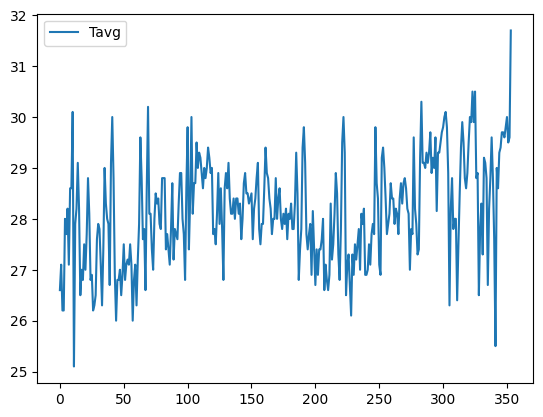

In [11]:
#plotting tavg
df1[['Tavg']].plot()

<Axes: >

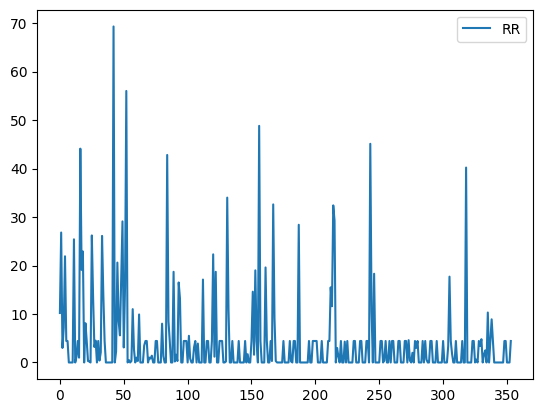

In [12]:
#plotting tavg
df1[['RR']].plot()

In [13]:
#shifting tx, tavg, dan rr
df1['ptx'] = df1.shift(-1)["Tx"]
df1['pta'] = df1.shift(-1)["Tavg"]
df1['ptr'] = df1.shift(-1)["RR"]
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg,ptx,pta,ptr
0,0,0,2023-01-01,24.2,29.1,10.200000,26.6,29.4,27.1,26.800000
1,31,31,2023-01-02,24.9,29.4,26.800000,27.1,30.6,26.2,3.000000
2,59,60,2023-01-03,23.8,30.6,3.000000,26.2,32.2,26.2,7.200000
3,90,92,2023-01-04,23.9,32.2,7.200000,26.2,31.5,28.0,21.900000
4,120,123,2023-01-05,25.4,31.5,21.900000,28.0,32.4,27.7,4.432246
...,...,...,...,...,...,...,...,...,...,...
349,349,360,2023-12-16,25.9,34.0,4.432246,29.8,36.0,30.0,0.000000
350,350,361,2023-12-17,26.2,36.0,0.000000,30.0,35.8,29.5,0.000000
351,351,362,2023-12-18,26.4,35.8,0.000000,29.5,35.6,29.6,0.000000
352,352,363,2023-12-19,26.2,35.6,0.000000,29.6,36.0,31.7,4.432246


In [14]:
# ambil data RR, tavg, pta, ptr
df1 = df1[['RR', 'Tavg', 'pta', 'ptr']]
df1

,RR,Tavg,pta,ptr
0,10.200000,26.6,27.1,26.800000
1,26.800000,27.1,26.2,3.000000
2,3.000000,26.2,26.2,7.200000
3,7.200000,26.2,28.0,21.900000
4,21.900000,28.0,27.7,4.432246
...,...,...,...,...
349,4.432246,29.8,30.0,0.000000
350,0.000000,30.0,29.5,0.000000
351,0.000000,29.5,29.6,0.000000
352,0.000000,29.6,31.7,4.432246


In [15]:
#hapus yang kosong
df1 = df1.iloc[:-1, :].copy()
df1

,RR,Tavg,pta,ptr
0,10.200000,26.6,27.1,26.800000
1,26.800000,27.1,26.2,3.000000
2,3.000000,26.2,26.2,7.200000
3,7.200000,26.2,28.0,21.900000
4,21.900000,28.0,27.7,4.432246
...,...,...,...,...
348,4.432246,29.6,29.8,4.432246
349,4.432246,29.8,30.0,0.000000
350,0.000000,30.0,29.5,0.000000
351,0.000000,29.5,29.6,0.000000


In [16]:
#import library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
#buat indeks
df1['Indeks'] = df1.reset_index().index
df1

,RR,Tavg,pta,ptr,Indeks
0,10.200000,26.6,27.1,26.800000,0
1,26.800000,27.1,26.2,3.000000,1
2,3.000000,26.2,26.2,7.200000,2
3,7.200000,26.2,28.0,21.900000,3
4,21.900000,28.0,27.7,4.432246,4
...,...,...,...,...,...
348,4.432246,29.6,29.8,4.432246,348
349,4.432246,29.8,30.0,0.000000,349
350,0.000000,30.0,29.5,0.000000,350
351,0.000000,29.5,29.6,0.000000,351


In [18]:
#data training dan testing
X = df1[["Indeks", "Tavg"]]
y = df1["pta"]

In [19]:
#data spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size = 0.2, random_state=0, shuffle = False)


In [20]:
#data fitting
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
X_test

,Indeks,Tavg
282,282,29.2
283,283,30.3
284,284,29.1
285,285,29.1
286,286,29.0
...,...,...
348,348,29.6
349,349,29.8
350,350,30.0
351,351,29.5


In [22]:
#testing
pred1 = lr.predict(X_test)
pred1

array([28.65588411, 29.18443826, 28.60931229, 28.61001943, 28.56274048,
       28.70740589, 28.61214085, 28.70882017, 28.90147168, 28.51829008,
       28.6629555 , 28.56769045, 28.85631414, 28.16272251, 28.71377014,
       28.71447728, 28.81115661, 28.90783593, 28.95652916, 29.05320849,
       29.10190172, 28.95865058, 28.52748288, 27.28055162, 28.19299451,
       28.48161821, 28.00246442, 28.09914375, 28.09985088, 27.33278054,
       27.8613347 , 28.34190276, 28.77448473, 29.01512234, 28.82388511,
       28.4886896 , 28.39342455, 28.53808997, 28.82671366, 29.06735126,
       29.02007231, 29.308696  , 29.02148659, 29.31011028, 28.49505385,
       28.54374708, 27.392788  , 28.01731434, 28.25795194, 27.77879815,
       28.69124105, 28.64396209, 28.50071096, 27.49371015, 28.21420868,
       28.50283237, 28.88742825, 28.50424665, 27.92912068, 26.92211988,
       28.60234025, 28.41110302, 28.74771281, 28.79640604, 28.94107145,
       28.94177859, 28.89449964, 28.99117896, 29.08785829, 28.84

In [23]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(y_test, pred1)
mse = mean_squared_error(y_test, pred1)
print(mae, mse)

0.8198266797301775 1.0179387753799722


In [24]:
X_test['Indeks'] = X_test.index
X_test

,Indeks,Tavg
282,282,29.2
283,283,30.3
284,284,29.1
285,285,29.1
286,286,29.0
...,...,...
348,348,29.6
349,349,29.8
350,350,30.0
351,351,29.5


In [25]:
predd = pd.DataFrame(pred1).set_index(X_test['Indeks'])
predd

,0
Indeks,
282,28.655884
283,29.184438
284,28.609312
285,28.610019
286,28.562740
...,...
348,28.894500
349,28.991179
350,29.087858


In [26]:
kan = pd.concat([df1['Tavg'], predd], axis=1)
kan.sort_index(False).head(1000)

<ipython-input-26-a78c5f2a57f4>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  kan.sort_index(False).head(1000)


,Tavg,0
0,26.6,NaN
1,27.1,NaN
2,26.2,NaN
3,26.2,NaN
4,28.0,NaN
...,...,...
348,29.6,28.894500
349,29.8,28.991179
350,30.0,29.087858
351,29.5,28.848635


<Axes: >

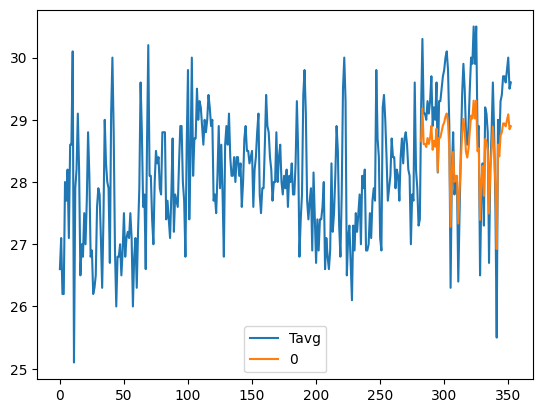

In [27]:
kan.plot()

In [28]:
new_data = [[354,29.6],[355,29.6],[356,29.6],[357,29.6],[358,29.6],[359,29.6],[360,29.6]]
lr.predict(new_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([28.89874247, 28.89944961, 28.90015675, 28.90086389, 28.90157103,
       28.90227817, 28.90298531])

In [29]:
kan.to_json('Prediksi Jawa Tengah.json')